In [1]:
#importing all the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as mb
%matplotlib inline
import seaborn as sb

In [2]:
#importing and reaading the dataset

sc = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
print("Data imported successfully")

Data imported successfully


In [3]:
#info if the dataset

sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
#the first five values in the dataset

sc.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Text(0.5, 1.0, 'Hours vs Scores')

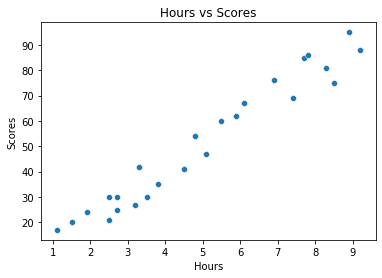

In [5]:
# Plotting the distribution of scores

sb.scatterplot(x='Hours',y='Scores', data=sc)
mb.title('Hours vs Scores')

In [6]:
#import of model from sklearn

from sklearn.model_selection import train_test_split

In [7]:
#dividing the data into "attributes" (inputs) and "labels" (outputs)

X = sc.iloc[:, :-1].values  
y = sc.iloc[:, 1].values 

#splitting the data using Scikit-Learn's built-in train_test_split() method:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [8]:
#import of linear regression model from sklearn

from sklearn.linear_model import LinearRegression  
lr = LinearRegression()  
lr.fit(X_train, y_train) 

print("Training is complete.")

Training is complete.


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method

In [9]:
#finding the coefficient of regression

lr.coef_

array([9.89775614])

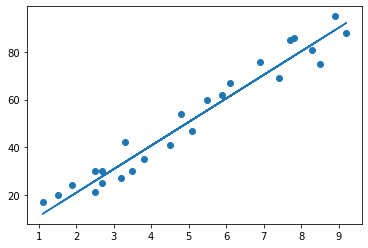

In [10]:
# Plotting the regression line

line = lr.coef_*X+lr.intercept_

# Plotting for the test data

mb.scatter(X, y)
mb.plot(X, line);
mb.show()

In [11]:
#predicting the model

pre = lr.predict(X_test)

In [12]:
# Comparing Actual vs Predicted Data

df = pd.DataFrame({'Actual Data': y_test, 'Predicted Data': pre})  
df

,Actual Data,Predicted Data
0,20,15.947762
1,27,32.773947
2,69,74.344523
3,30,25.845518
4,62,59.497889
5,35,38.712601
6,24,19.906864
7,86,78.303625
8,76,69.395645
9,17,11.988659


In [13]:
#Finding out the task where the student studies for 9.25 hrs/ day

dataset = np.array(9.25)
hrs = dataset.reshape(-1, 1)
hrs_pre = lr.predict(hrs)
print('Predicted Score of a student studies for 9.25 hrs/day is = {}'.format(hrs_pre))

Predicted Score of a student studies for 9.25 hrs/day is = [92.65537185]


In [14]:
##Evaluation of the model

##We have found out the Mean Absolute Error and R-Square

In [15]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pre))

Mean Absolute Error: 4.8945108634106065


In [16]:
from sklearn.metrics import r2_score
print("The R-Square of the model is: ",r2_score(y_test,pre))

The R-Square of the model is:  0.956640847232559
